#### PRAMOD KUNJUKUNJU SAJI
#### 8856432
#### Lab 3

#### Part A

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Kaggle Dataset - Credit Card Fraud Detection: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [2]:
# Load the dataset
df_creditcard = pd.read_csv("./creditcard.csv")

In [3]:
# Print the first 5 rows of the dataframe
df_creditcard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Print the summary statistics of the dataframe
df_creditcard.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
# Check if the dataset has any null values
df_creditcard.isnull().values.any()

False

Visualization: Fraud v/s Non Fraud transactions

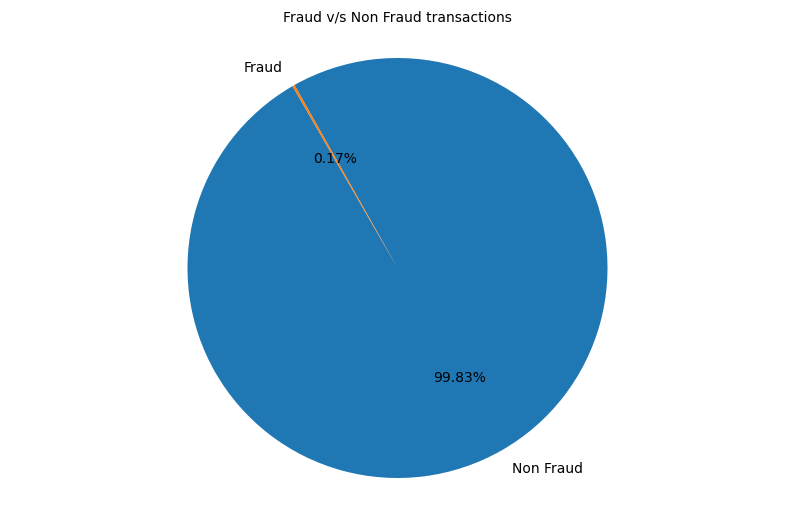

In [6]:
labels = 'Non Fraud', 'Fraud'

sizes = [df_creditcard.Class[df_creditcard['Class']==0].count(), df_creditcard.Class[df_creditcard['Class']==1].count()]

fig1, ax1 = plt.subplots(figsize=(10, 6))

ax1.pie(sizes, labels=labels, autopct='%1.2f%%', shadow=False, startangle=120)

ax1.axis('equal')
title = "Fraud v/s Non Fraud transactions"
plt.title(title, size=10, pad=12)

# Show the pie chart
plt.show()

In [7]:
# Set independent and dependent variables
X = df_creditcard.drop('Class', axis=1)
y = df_creditcard['Class']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [8]:
# Create an instance of StandardScaler
scaler = StandardScaler()

# Scale the training data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
# Create an instance of LogisticRegression
model = LogisticRegression(random_state=123)

# Fit the model
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=123)

In [10]:
# Predict the classes
y_pred = model.predict(X_test_scaled)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = accuracy * 100

# Print the accuracy score
print(f'Accuracy percentage: {accuracy_percentage}%')

Accuracy percentage: 99.90285921608559%


#### Part B

In [11]:
# Import necessary libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Kaggle Dataset - Medical Cost Personal Datasets: https://www.kaggle.com/datasets/mirichoi0218/insurance

In [12]:
# Load the dataset
df_insurance = pd.read_csv("./insurance.csv")

In [13]:
# Print the first 5 rows of the dataframe
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [14]:
# Print the summary statistics of the dataframe
df_insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [15]:
# Check if the dataset has any null values
df_insurance.isnull().values.any()

False

Label Encoding for categorical columns - sex and smoker

In [16]:
# Create an instance of LabelEncoder
le = LabelEncoder()

# Label encoding for categorical column - sex
df_insurance.iloc[:, 1] = le.fit_transform(df_insurance.iloc[:, 1])

# Label encoding for categorical column - smoker
df_insurance.iloc[:, 4] = le.fit_transform(df_insurance.iloc[:, 4])

# Print the first 5 rows of the dataframe
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


OneHot Encoding for categorical column - region

In [17]:
# Create an instance of OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [5])], remainder='passthrough')

# OneHot encoding for categorical column - region
df_insurance.iloc[:, 5] = le.fit_transform(df_insurance.iloc[:, 5])

# Print the first 5 rows of the dataframe
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [18]:
# Set independent and dependent variables
X_i = df_insurance.drop('charges', axis=1)
y_i = df_insurance['charges']

In [19]:
# Split the dataset into train and test sets
X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(X_i, y_i, test_size=0.3, random_state=123)

In [20]:
# Create an instance of LinearRegression
linearModel = LinearRegression()

# Fit the model
linearModel.fit(X_train_i, y_train_i)

LinearRegression()

In [21]:
# Predict the classes
y_pred_i = linearModel.predict(X_test_i)

In [22]:
# Calculate the mwan squared error and r-squared value
mean_squared_error_value = mean_squared_error(y_test_i, y_pred_i)
r2_score_value = r2_score(y_test_i, y_pred_i)

# Print the mean squared error and r-squared value
print(f'Mean Squared Error: {mean_squared_error_value}')
print(f'R-squared value: {r2_score_value * 100}')

Mean Squared Error: 33913914.85714985
R-squared value: 76.26072475418817
